## **H20**

H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles – one based on all previously trained models, another one on the best model of each family – will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

In [1]:
! pip install h2o

     |████████████████████████████████| 164.8MB 82kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=5eb0b88b4d6aab25e11f1647bc0138e65cfd0fcba4f0fde5fcbfa1092245431b
  Stored in directory: /root/.cache/pip/wheels/4d/94/84/02ea21db1eebcef2da872861ce0db478788e27d24bcd5394fb
Successfully built h2o


In [2]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu7llm25w
  JVM stdout: /tmp/tmpu7llm25w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu7llm25w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_a2v27n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
import pandas as pd

In [5]:
import datetime as dt
from pandas_datareader import data

dataset_raw = data.DataReader('BTC-USD','yahoo', dt.datetime(2000,1,1), dt.datetime.now())
dataset_raw.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [6]:

titanic_df = h2o.H2OFrame(dataset_raw)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
# Reponse column
y = "Close"

In [9]:
# Split into train & test
splits = titanic_df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [10]:
# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210417_065454,31722.4,178.108,31722.4,53.9582,0.0171262,363,0.087969,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210417_065454,32563,180.452,32563,55.3064,0.0234126,346,0.053413,StackedEnsemble
XGBoost_grid__1_AutoML_20210417_065454_model_1,33669.2,183.492,33669.2,51.6949,0.0101461,526,0.008961,XGBoost
GBM_grid__1_AutoML_20210417_065454_model_2,41570.6,203.889,41570.6,64.0391,0.0132277,506,0.038212,GBM
XGBoost_grid__1_AutoML_20210417_065454_model_4,52792.8,229.767,52792.8,78.008,0.0160033,415,0.007958,XGBoost
XGBoost_grid__1_AutoML_20210417_065454_model_3,65416.9,255.767,65416.9,68.5707,0.0137966,555,0.007938,XGBoost
XGBoost_grid__1_AutoML_20210417_065454_model_2,65758.5,256.434,65758.5,72.7024,0.0134372,453,0.005723,XGBoost
XGBoost_grid__1_AutoML_20210417_065454_model_6,66068.1,257.037,66068.1,86.4815,0.0151782,110,0.003301,XGBoost
GBM_grid__1_AutoML_20210417_065454_model_1,68271.3,261.288,68271.3,106.62,0.0517434,398,0.023732,GBM
XGBoost_3_AutoML_20210417_065454,88911.1,298.18,88911.1,95.9052,0.0260778,193,0.003272,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

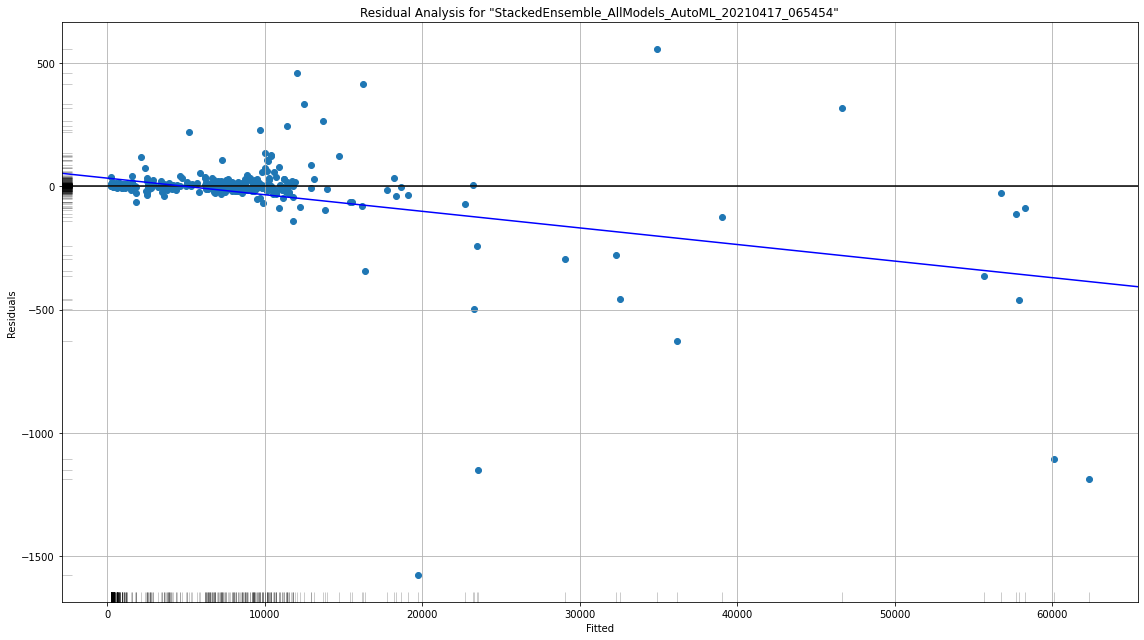

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

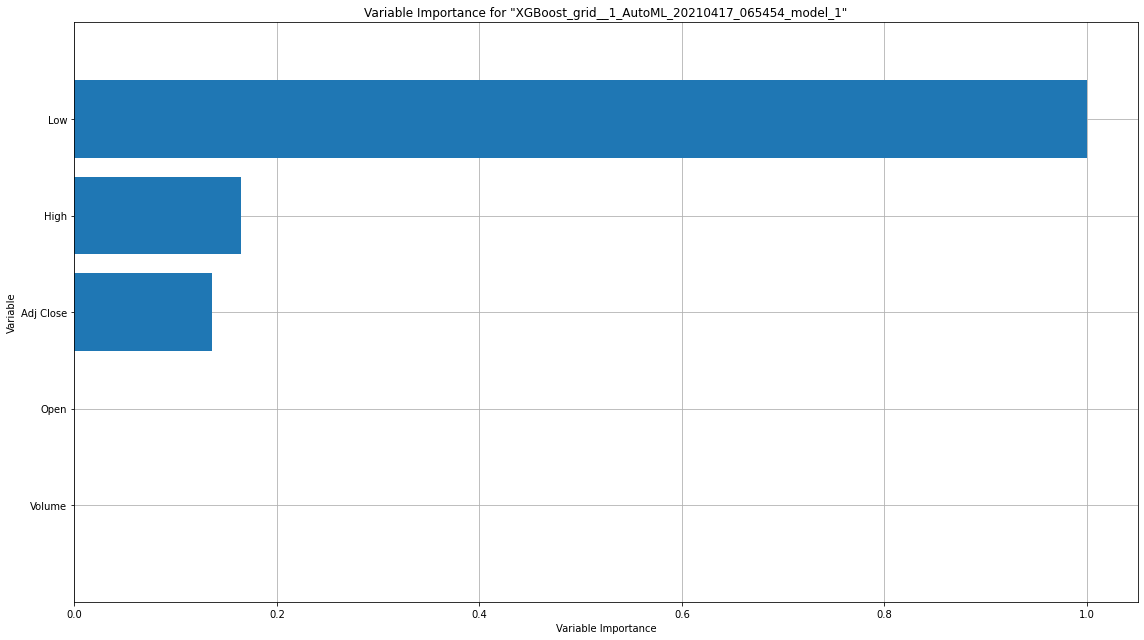

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

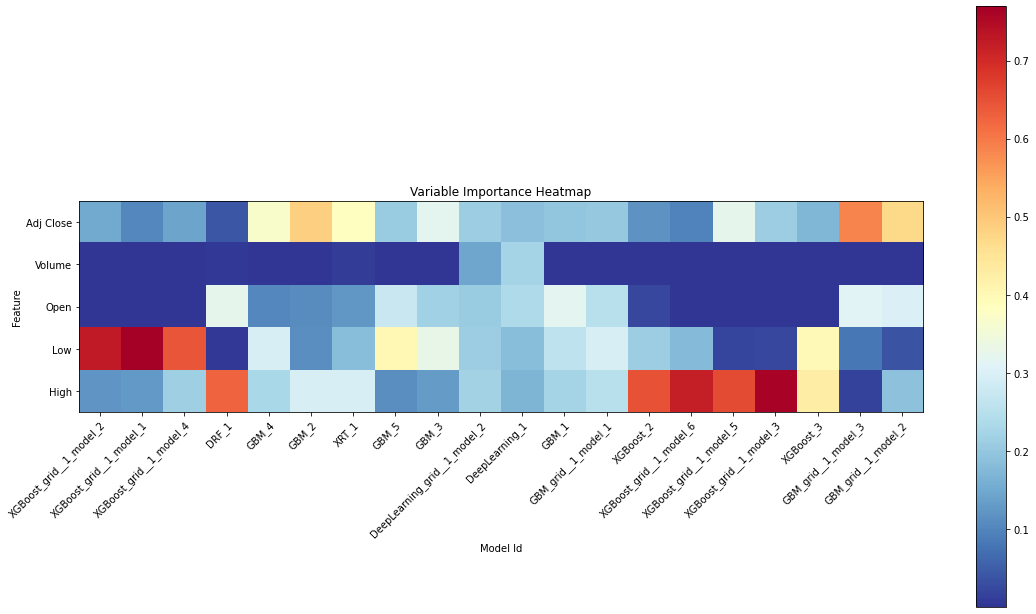

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

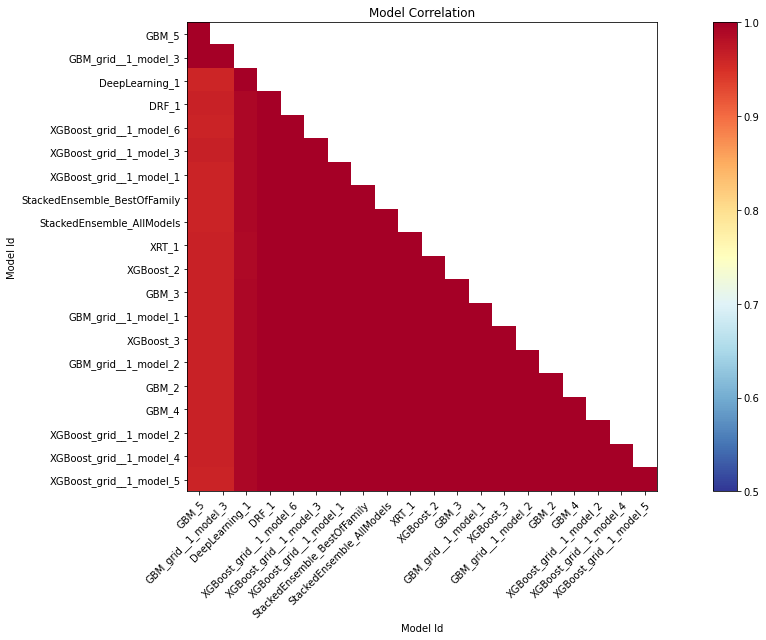

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

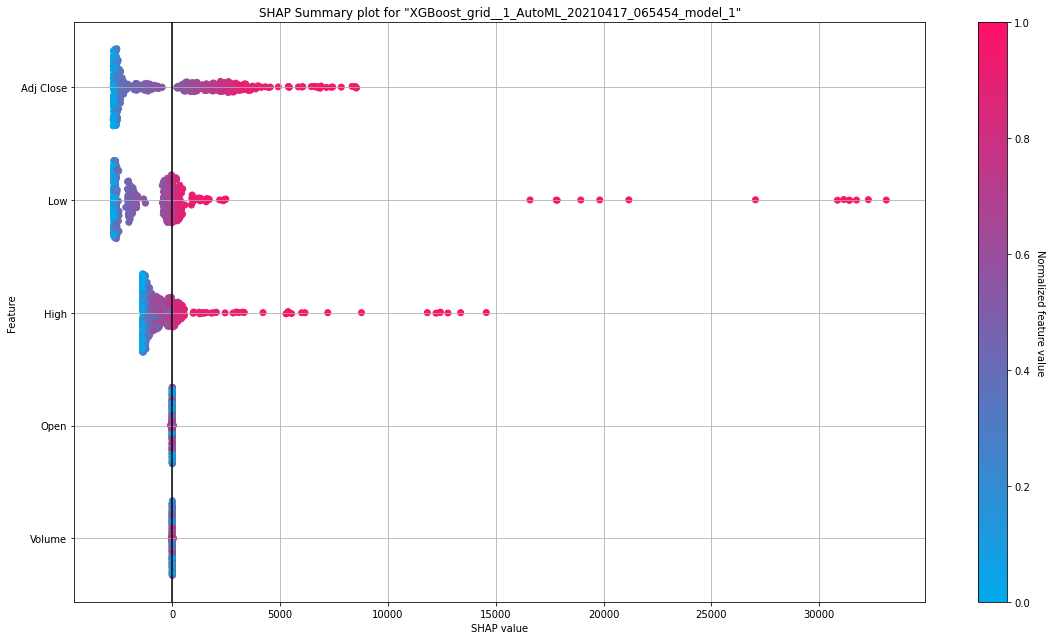

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

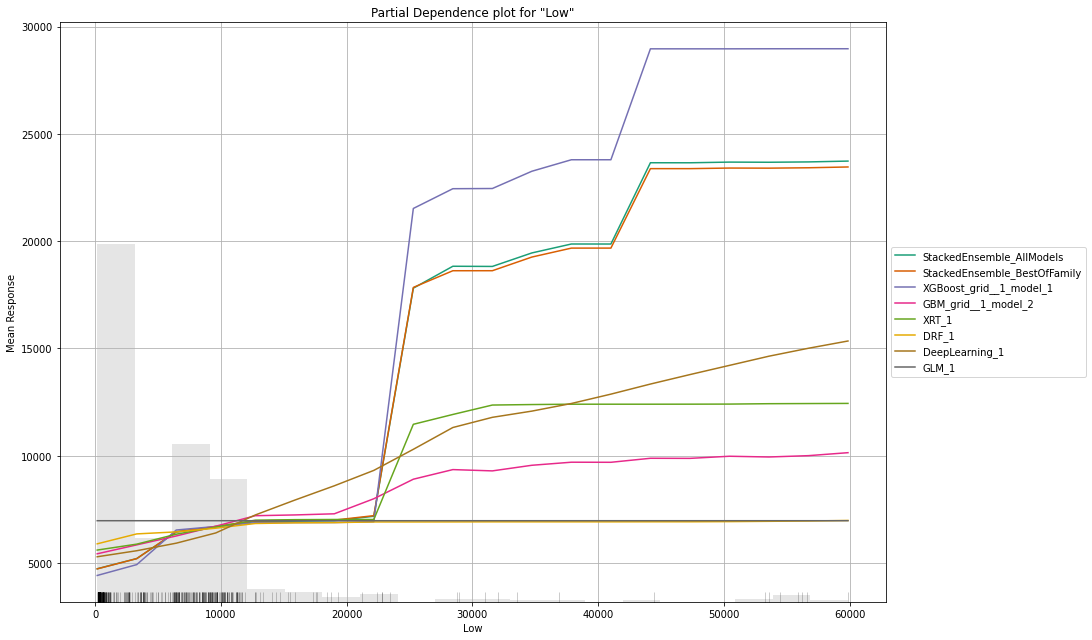

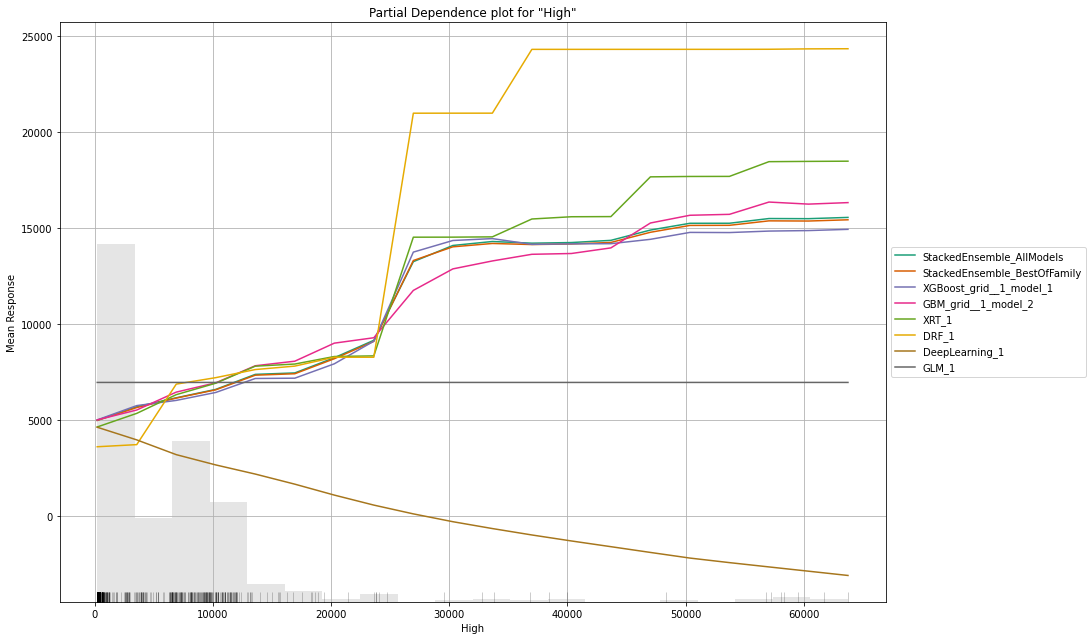

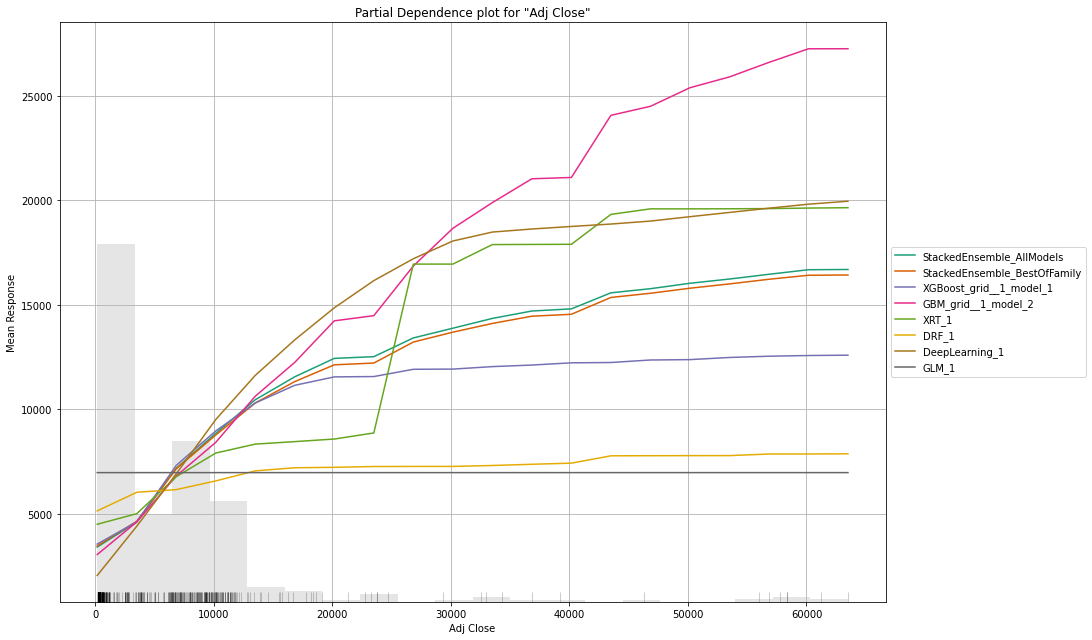

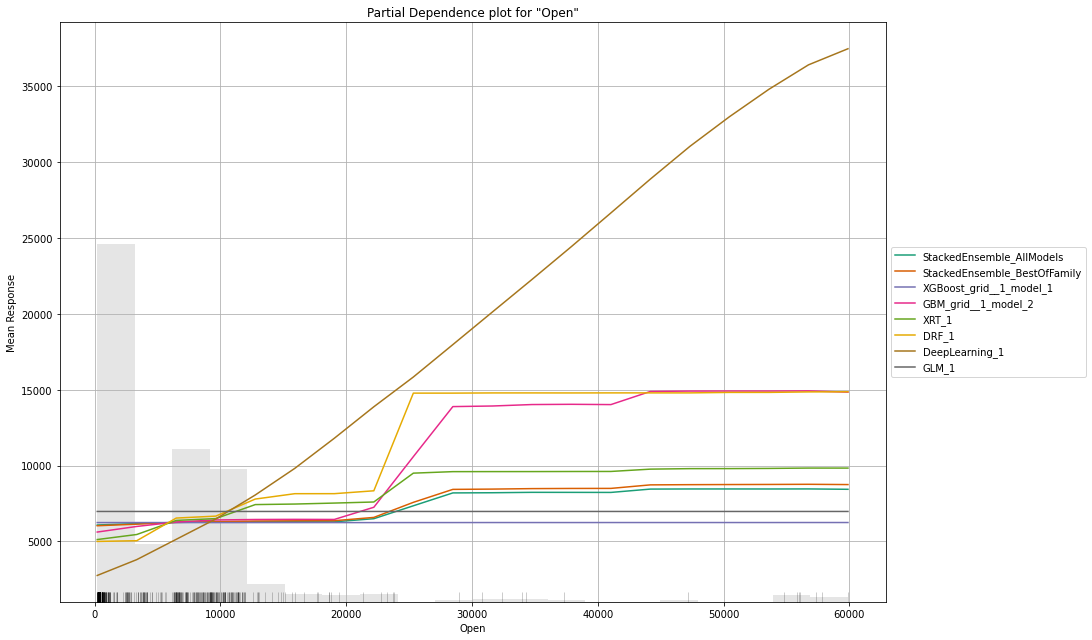

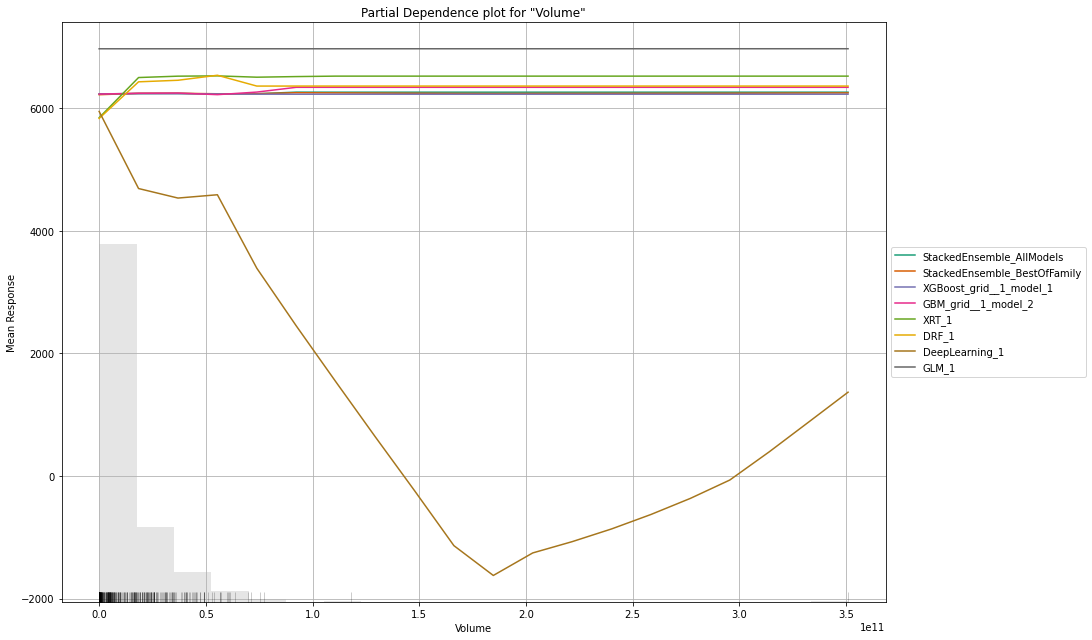

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

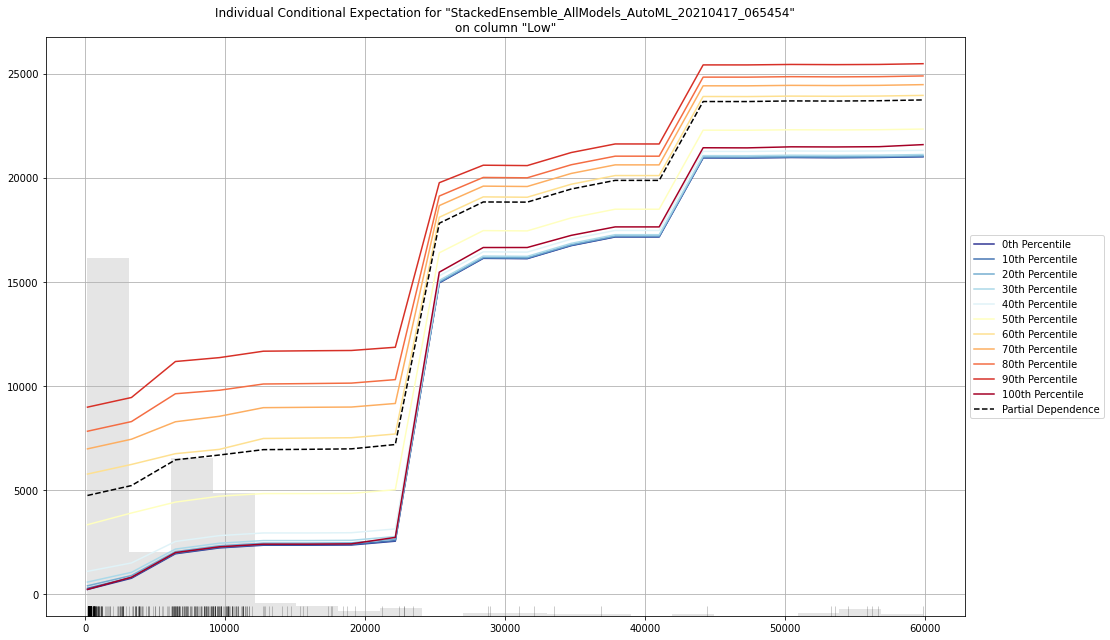

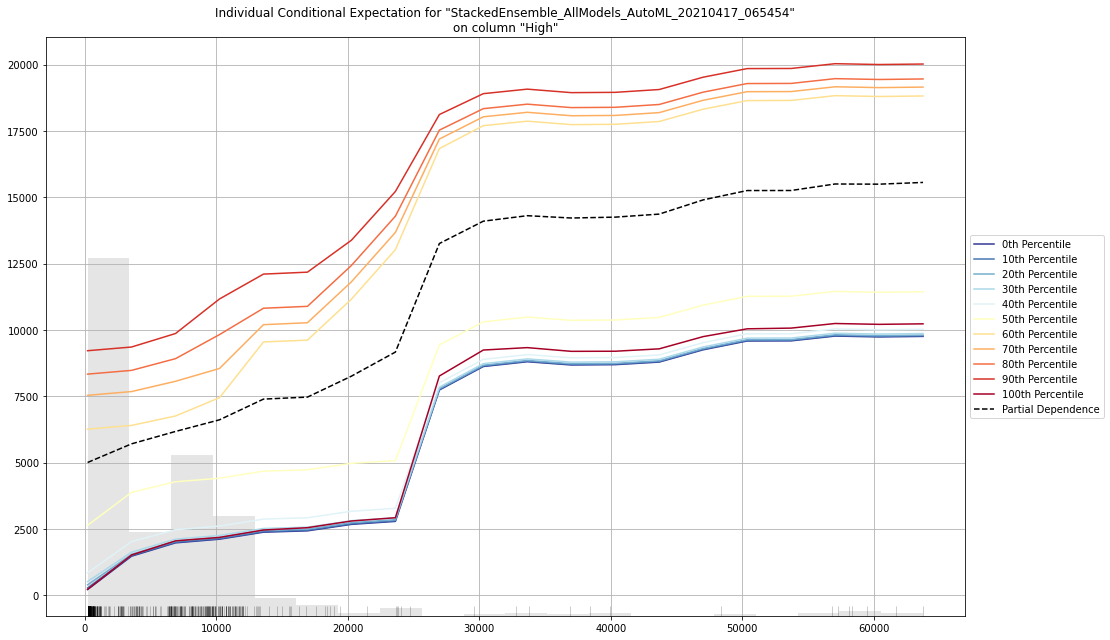

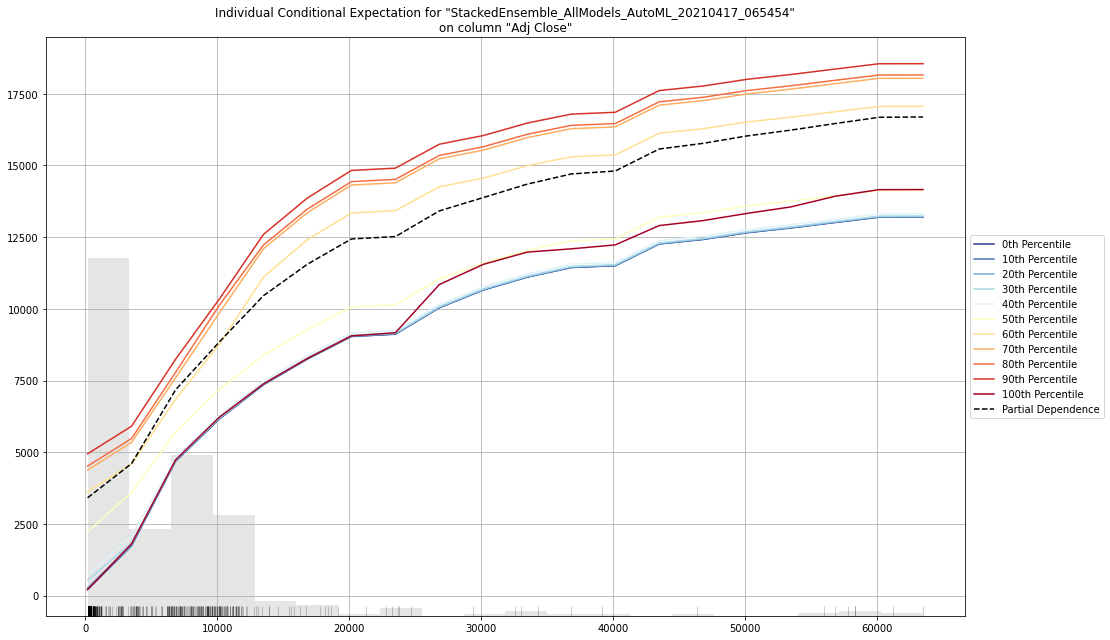

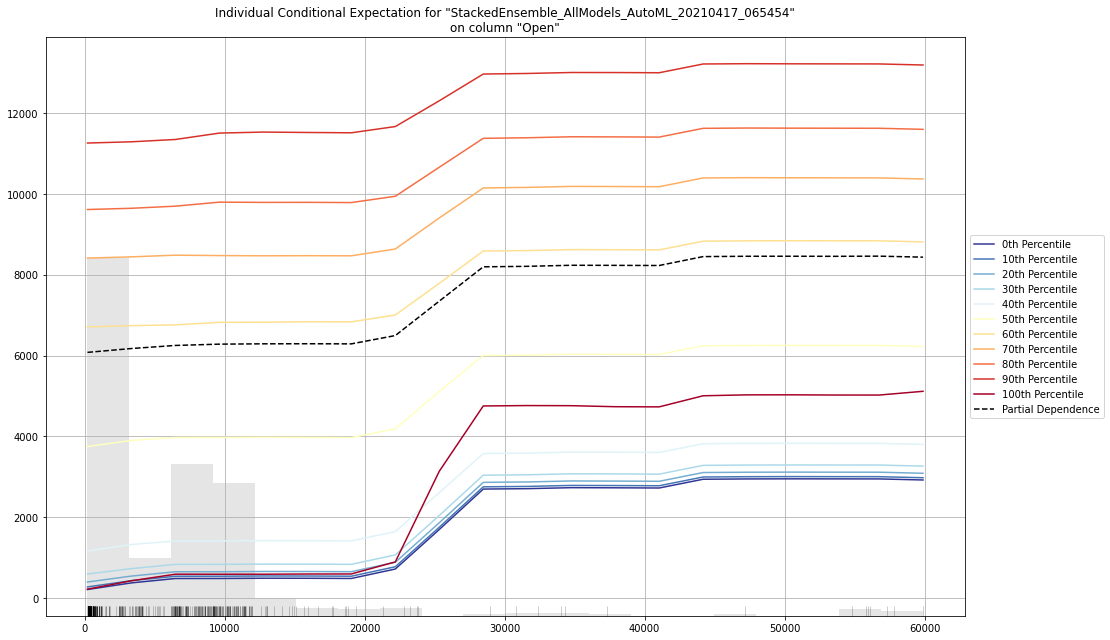

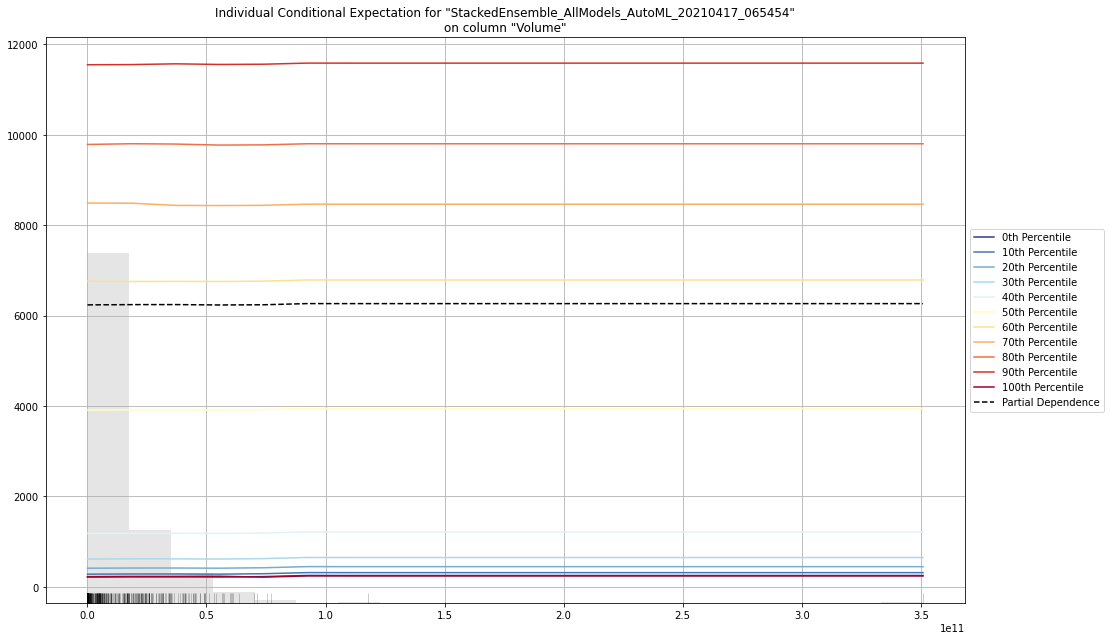

In [11]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(test)


In [ ]:
train, test = titanic_df.split_frame([0.8], seed=42)

In [ ]:
# Import a sample binary outcome train/test set into H2O
#train = h2o.upload_file("/content/titanic.csv")
#test = h2o.upload_file("/content/titanic.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
train.head()


High,Low,Open,Close,Volume,Adj Close
468.174,452.422,465.864,457.334,2.10568e+07,457.334
456.86,413.104,456.86,424.44,3.44832e+07,424.44
427.835,384.532,424.103,394.796,3.79197e+07,394.796
423.296,389.883,394.673,408.904,3.68636e+07,408.904
412.426,393.181,408.085,398.821,2.65801e+07,398.821
406.916,397.13,399.1,402.152,2.41276e+07,402.152
441.557,396.197,402.092,435.791,4.50995e+07,435.791
436.112,421.132,435.751,423.205,3.06277e+07,423.205
423.52,409.468,423.156,411.574,2.68144e+07,411.574
414.938,400.009,411.429,404.425,2.14608e+07,404.425


In [ ]:
test.head(rows=test.nrows)

High,Low,Open,Close,Volume,Adj Close
406.623,397.372,403.556,399.52,1.50293e+07,399.52
391.379,380.78,387.427,383.615,2.62294e+07,383.615
382.726,347.687,352.748,365.026,8.36411e+07,365.026
375.067,352.963,364.687,361.562,4.36657e+07,361.562
395.158,378.971,383.976,391.442,1.14168e+07,391.442
393.939,386.457,391.254,389.546,5.91457e+06,389.546
340.529,321.055,338.65,325.749,1.66772e+07,325.749
329.05,320.626,326.075,325.892,8.60362e+06,325.892
352.732,341.776,349.818,342.415,1.68342e+07,342.415
374.816,357.561,362.265,366.924,3.04501e+07,366.924


In [ ]:
# Identify predictors and response
x = train.columns
y = "Close"
x.remove(y)

In [ ]:
print(x)

['High', 'Low', 'Open', 'Volume', 'Adj Close']


In [ ]:
print(y)

Close


In [ ]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

H2OValueError: ignored

In [ ]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210314_082609,0.867344,0.417991,0.833798,0.185369,0.36001,0.129607
StackedEnsemble_BestOfFamily_AutoML_20210314_082609,0.867159,0.415897,0.843472,0.18524,0.359317,0.129109
DeepLearning_grid__1_AutoML_20210314_082609_model_1,0.86567,0.44635,0.828988,0.195575,0.367997,0.135422
GBM_1_AutoML_20210314_082609,0.856212,0.448569,0.827541,0.192356,0.375724,0.141169
XGBoost_grid__1_AutoML_20210314_082609_model_2,0.850512,0.447063,0.81523,0.211144,0.375339,0.14088
DRF_1_AutoML_20210314_082609,0.84838,0.596172,0.823328,0.207059,0.379138,0.143746
GBM_grid__1_AutoML_20210314_082609_model_2,0.848023,0.451754,0.813466,0.209754,0.379668,0.144148
XRT_1_AutoML_20210314_082609,0.847277,0.464304,0.787934,0.195781,0.382908,0.146618
GBM_4_AutoML_20210314_082609,0.847156,0.469444,0.808628,0.205986,0.386952,0.149732
XGBoost_grid__1_AutoML_20210314_082609_model_3,0.846268,0.449874,0.810182,0.204913,0.37572,0.141166


In [ ]:
# To generate predictions on a test set, you can make predictions
# directly on the `"H2OAutoML"` object or on the leader model
# object directly
preds = aml.predict(test)


stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20210314_082609,0.867344,0.417991,0.833798,0.185369,0.36001,0.129607,517,0.224089
StackedEnsemble_BestOfFamily_AutoML_20210314_082609,0.867159,0.415897,0.843472,0.18524,0.359317,0.129109,433,0.132522
DeepLearning_grid__1_AutoML_20210314_082609_model_1,0.86567,0.44635,0.828988,0.195575,0.367997,0.135422,21205,0.074798
GBM_1_AutoML_20210314_082609,0.856212,0.448569,0.827541,0.192356,0.375724,0.141169,411,0.026759
XGBoost_grid__1_AutoML_20210314_082609_model_2,0.850512,0.447063,0.81523,0.211144,0.375339,0.14088,124,0.021232
DRF_1_AutoML_20210314_082609,0.84838,0.596172,0.823328,0.207059,0.379138,0.143746,965,0.036717
GBM_grid__1_AutoML_20210314_082609_model_2,0.848023,0.451754,0.813466,0.209754,0.379668,0.144148,168,0.025169
XRT_1_AutoML_20210314_082609,0.847277,0.464304,0.787934,0.195781,0.382908,0.146618,439,0.047222
GBM_4_AutoML_20210314_082609,0.847156,0.469444,0.808628,0.205986,0.386952,0.149732,313,0.050435
XGBoost_grid__1_AutoML_20210314_082609_model_3,0.846268,0.449874,0.810182,0.204913,0.37572,0.141166,140,0.014616


In [ ]:
preds.head()

predict,p0,p1
0,0.737573,0.262427
1,0.140553,0.859447
1,0.0913928,0.908607
0,0.704296,0.295704
1,0.0704634,0.929537
1,0.0858912,0.914109
0,0.882154,0.117846
0,0.912559,0.0874415
0,0.882126,0.117874
0,0.85699,0.14301


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_AutoML_20210314_082609


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5128672028701597: 


,,0,1,Error,Rate
0,0,432.0,6.0,0.0137,(6.0/438.0)
1,1,31.0,235.0,0.1165,(31.0/266.0)
2,Total,463.0,241.0,0.0526,(37.0/704.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

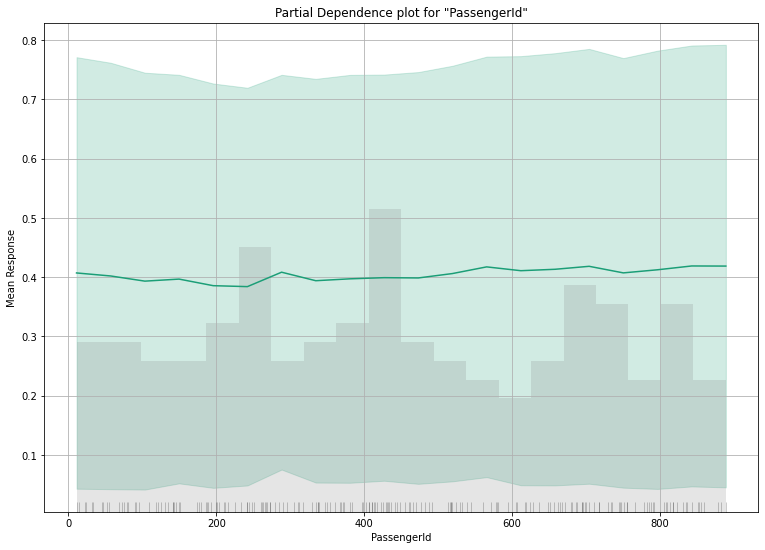

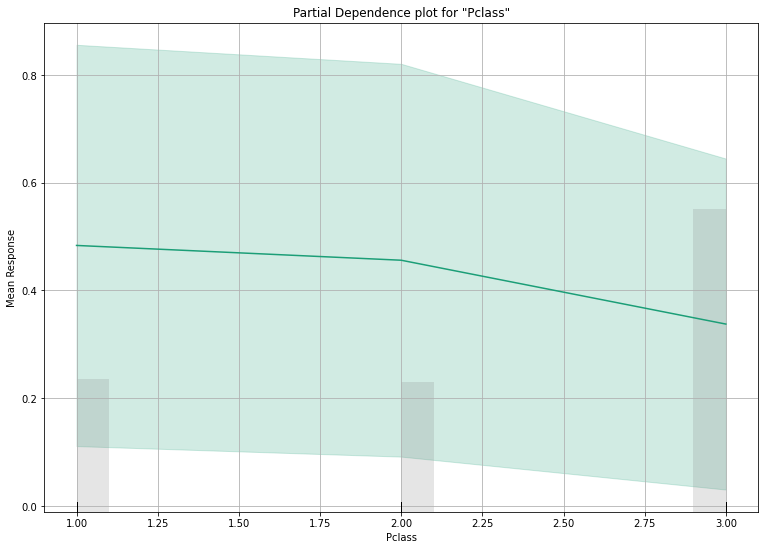

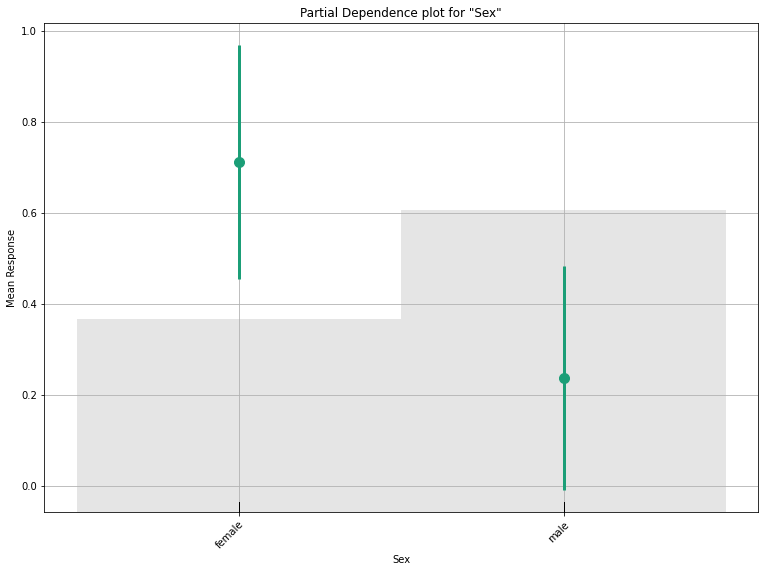

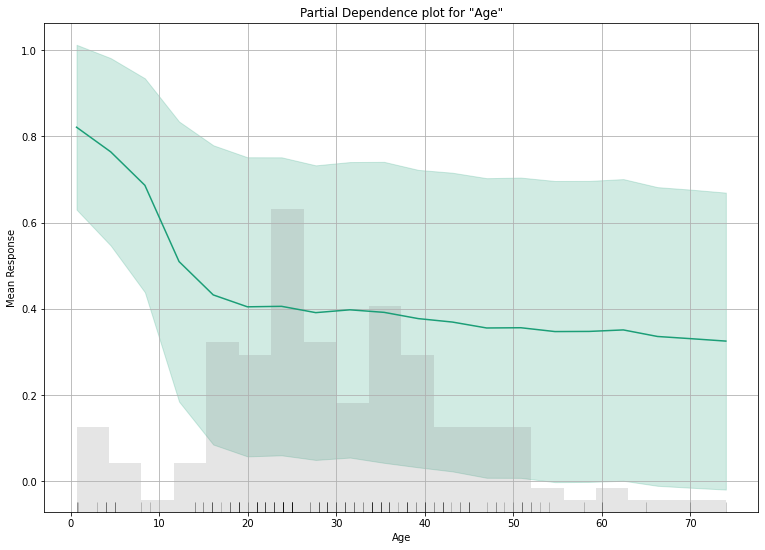

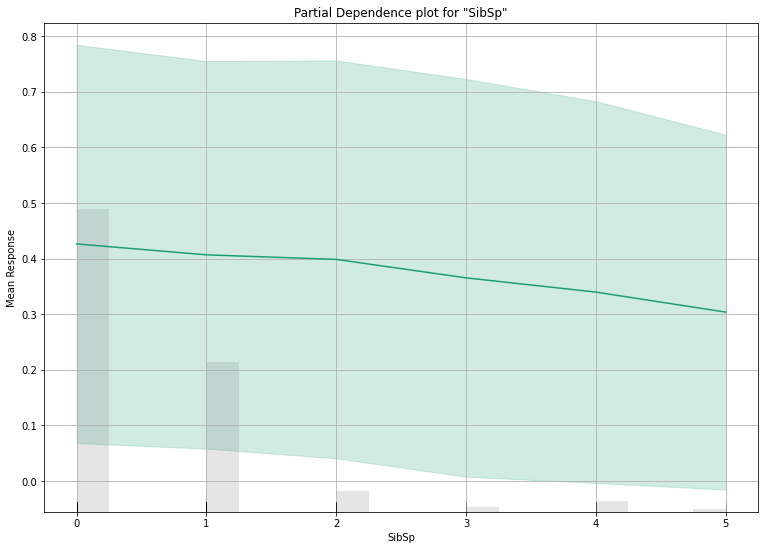

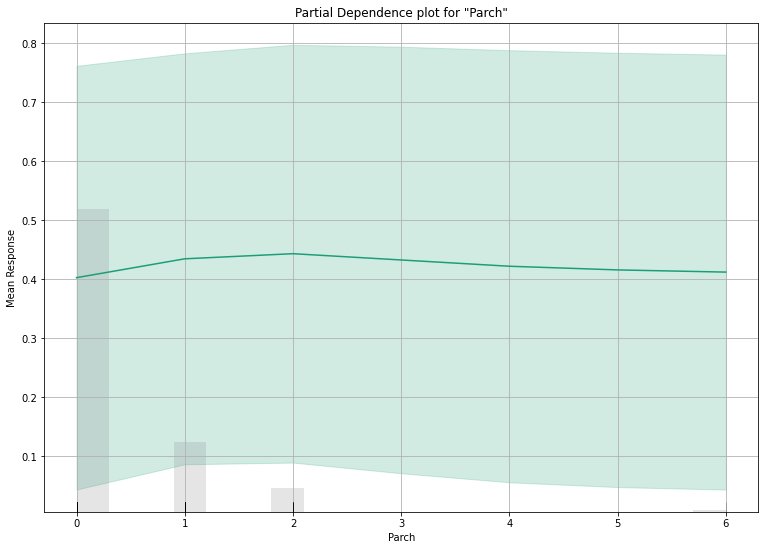

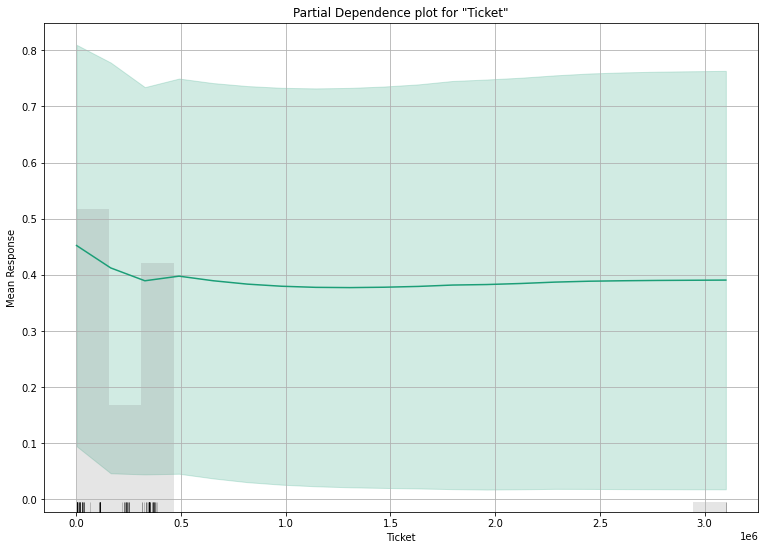

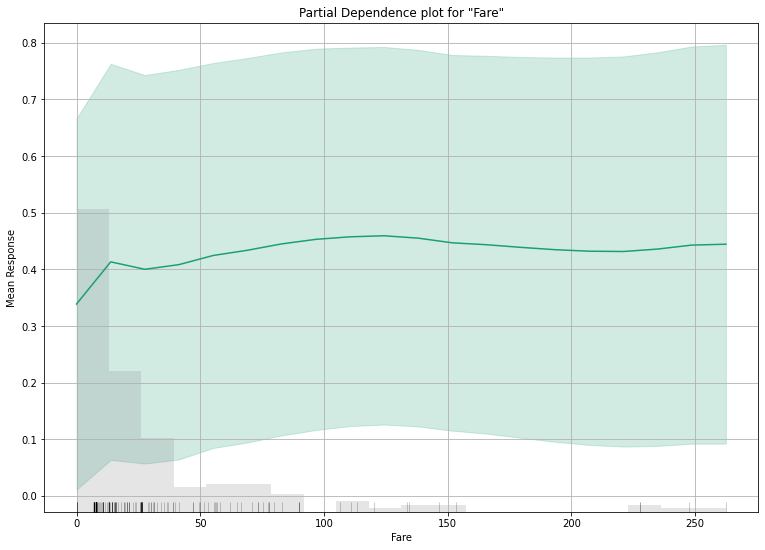

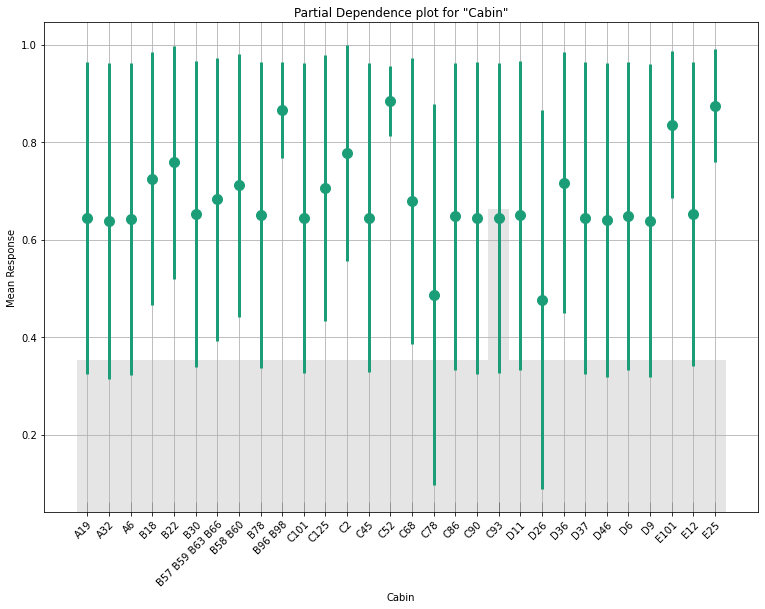

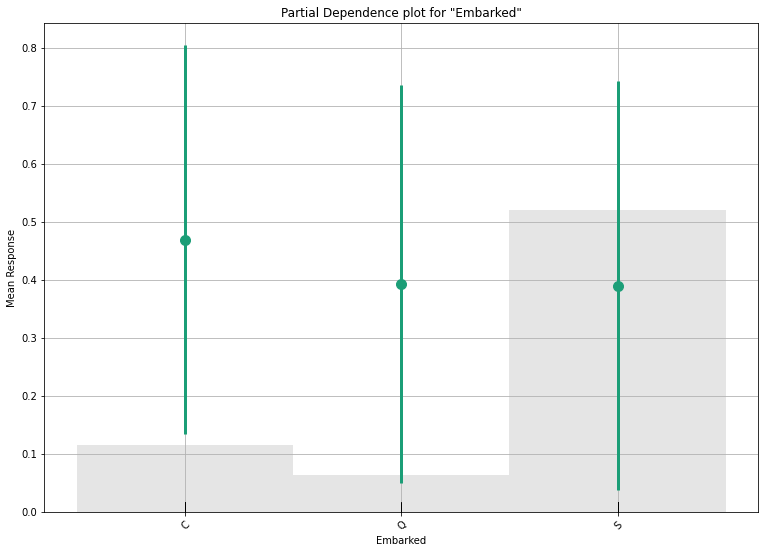

In [ ]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)